#### Analyzing the results of an airline survey to determine factors affecting Customer Satisfaction

#### Problem Statement
A US-based airline headquartered in Boston, Massachusetts. The latest passenger survey results just came in and it looks like the satisfaction rate dipped under 50% for the first time ever. 
#### Goal
Explore the dataset to discover possible factors that affected the satisfaction/satisfaction rate of customers represented in the survey

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# reading in the data
dtypes = {'Gender': 'category', 'Customer Type': 'category', 'Type of Travel': 'category', 'Class': 'category',
         'Satisfaction': 'category'}
df = pd.read_csv('airline_passenger_satisfaction.csv', dtype = dtypes)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# first five rows of the data
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   ID                                      129880 non-null  int64   
 1   Gender                                  129880 non-null  category
 2   Age                                     129880 non-null  int64   
 3   Customer Type                           129880 non-null  category
 4   Type of Travel                          129880 non-null  category
 5   Class                                   129880 non-null  category
 6   Flight Distance                         129880 non-null  int64   
 7   Departure Delay                         129880 non-null  int64   
 8   Arrival Delay                           129487 non-null  float64 
 9   Departure and Arrival Time Convenience  129880 non-null  int64   
 10  Ease of Online Booking          

In [6]:
satisfaction_rate = df['Satisfaction'].value_counts(normalize=True)['Satisfied']
print("Current Satisfaction Rate: {}%".format(round(satisfaction_rate * 100,2)))

Current Satisfaction Rate: 43.45%


In [7]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
df.describe(include='category')

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65899,106100,89693,62160,73452


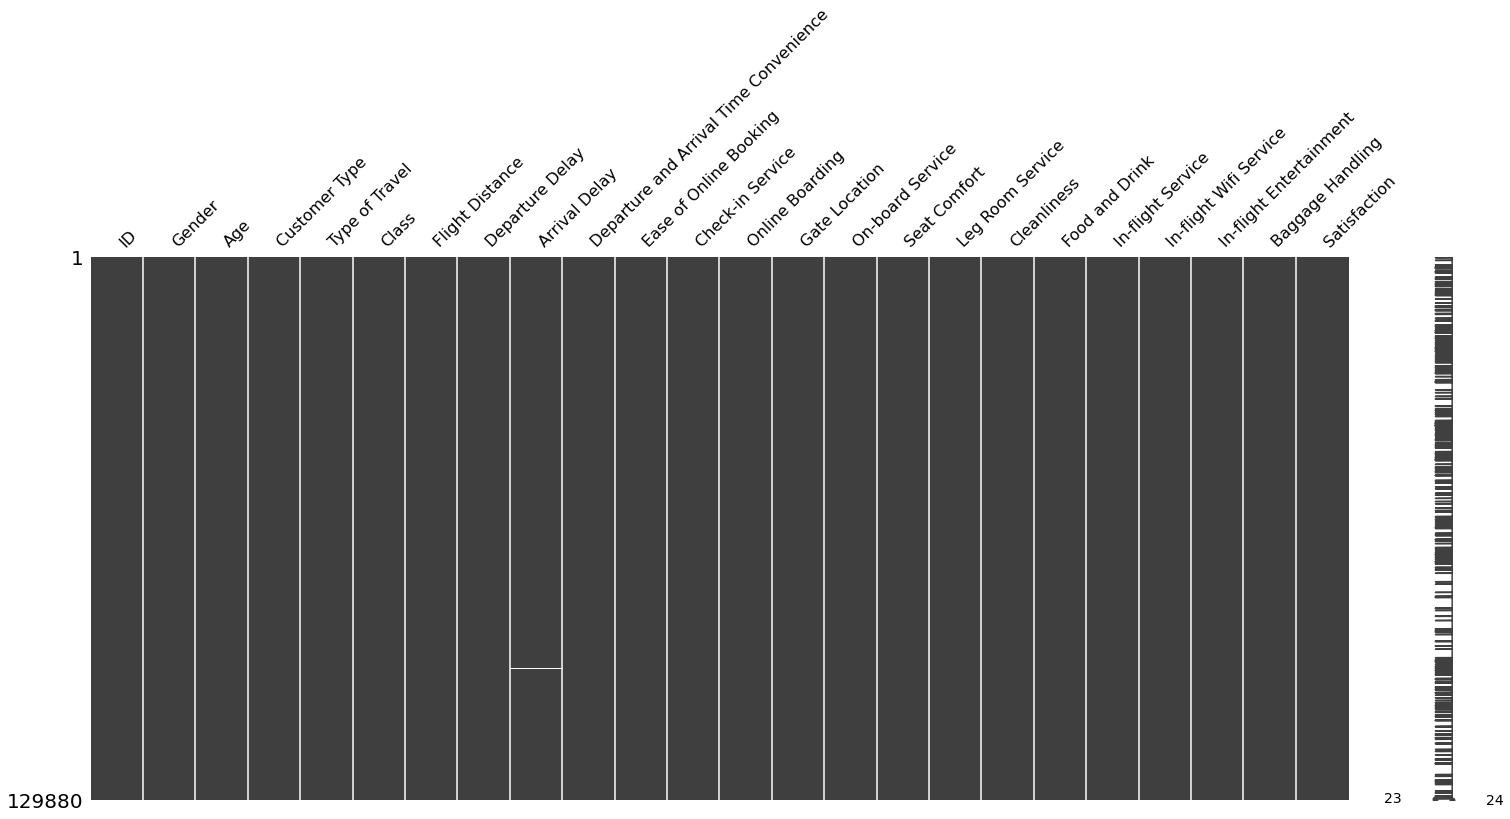

In [9]:
msno.matrix(df)

In [10]:
df.drop('ID', axis=1, inplace=True)

In [11]:
numerical_cols = [i for i in df.columns if df[i].dtype == 'int64' or df[i].dtype =='float']

In [12]:
df['Arrival Delay'].fillna(0, inplace=True)
df['Satisfaction Encoded'] = df['Satisfaction'].cat.rename_categories({'Neutral or Dissatisfied': 0, 'Satisfied': 1}).astype(int)

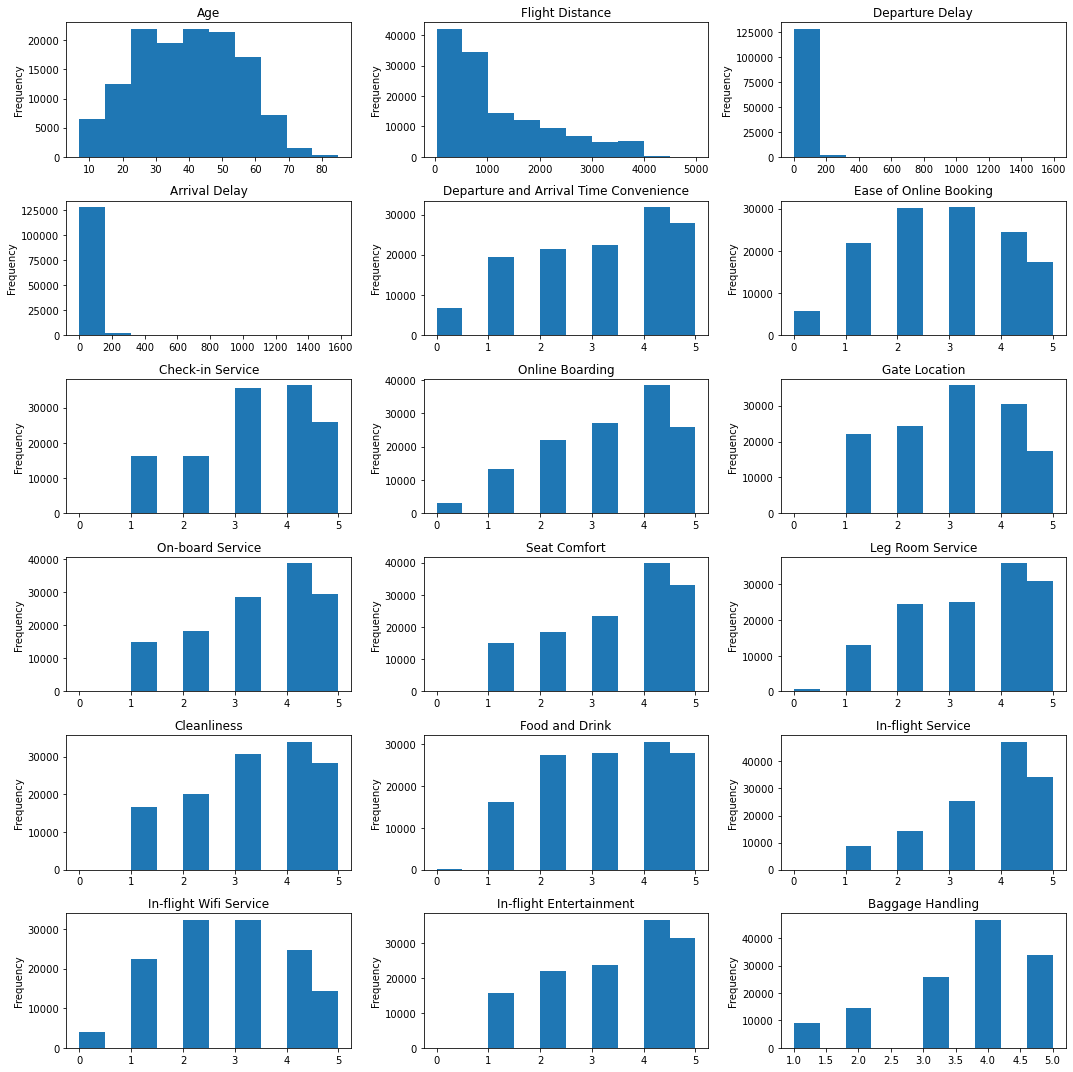

In [13]:
# Distribution of each numerical variable
fig, ax = plt.subplots(6, 3, figsize=(15,15))
x, y = 0, 0
for i in numerical_cols:
    df[i].plot.hist(title=i, ax=ax[x][y])
    y +=1
    if y==3:
        y=0
        x+=1
plt.tight_layout()

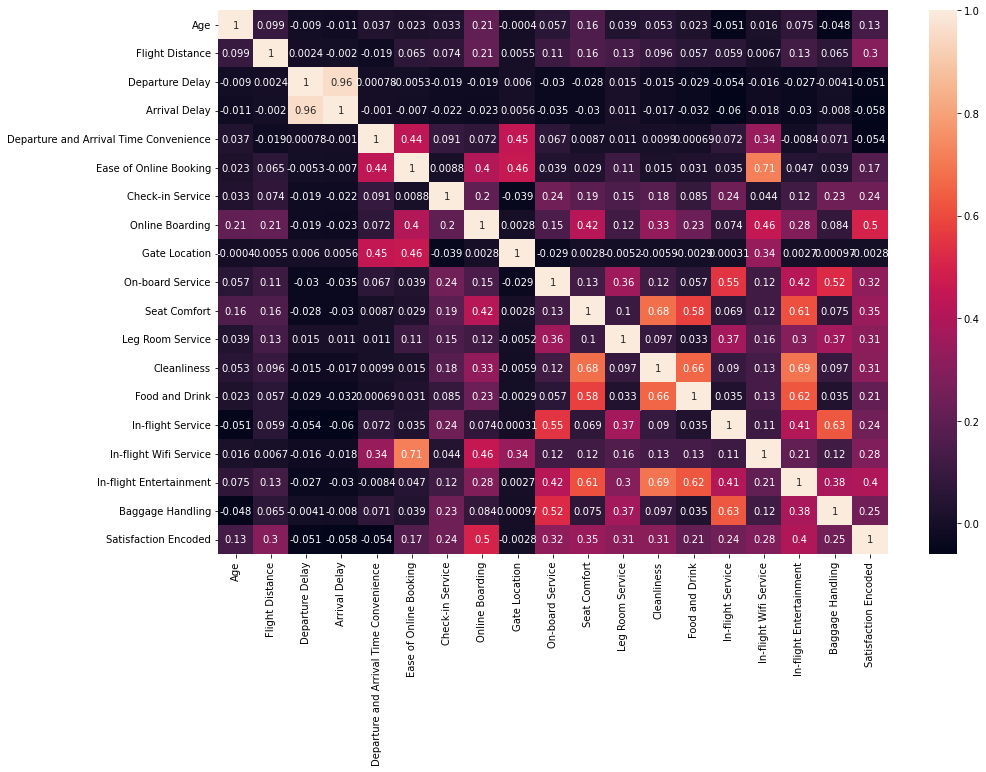

In [14]:
# correlation map of numerical variables.
correlation = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True)
plt.show()

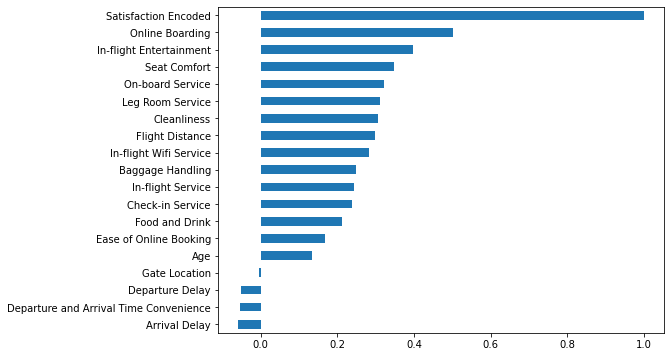

In [15]:
# correlation between the Satisfaction and other numerical variables in the dataset.
correlation['Satisfaction Encoded'].sort_values().plot(kind='barh', figsize=(8,6))
plt.show()

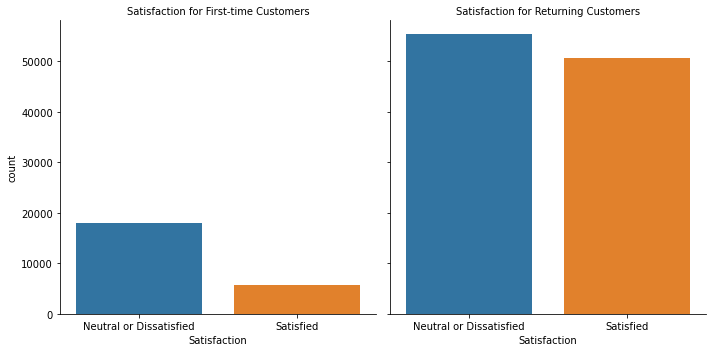

In [16]:
# Satisfaction by Customer Type
g = sns.catplot(x='Satisfaction', kind='count', col='Customer Type', data=df)
g.set_titles(col_template = 'Satisfaction for {col_name} Customers')
plt.show()

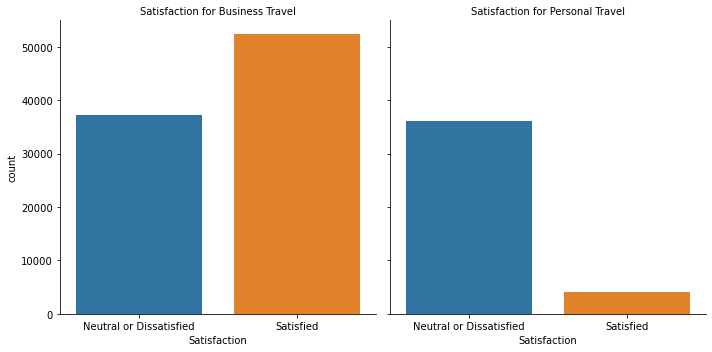

In [17]:
# Satisfaction by Type of Travel
g = sns.catplot(x='Satisfaction', kind='count', col='Type of Travel', data=df)
g.set_titles(col_template= 'Satisfaction for {col_name} Travel')
plt.show()

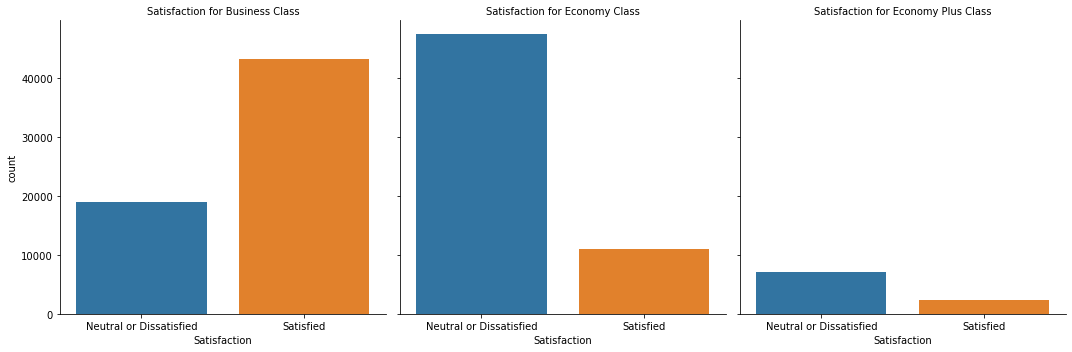

In [18]:
# Satisfaction by Class of Flight
g = sns.catplot(x='Satisfaction', kind='count', col='Class', data=df)
g.set_titles('Satisfaction for {col_name} Class')
plt.show()